In [28]:
import pandas as pd
import pickle as pk
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df = pd.read_csv(f"./../../outputs/cities_prediction.csv")
common_columns = ["Geoname ID", "Name", "Population", "Elevation", "Coordinates", "Latitude", "Longitude", "city"]
expe_columns = [col for col in df.keys() if "lat_predicted" in col or "lon_predicted" in col]
selected_columns = common_columns + expe_columns
selected_columns = [col for col in selected_columns if col in df.columns]

df = df[common_columns + expe_columns]
df.head()


,Geoname ID,Name,Population,Elevation,Coordinates,Latitude,Longitude,city,mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted,mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted,...,Qwen/Qwen2.5-32B_int4_gps_en_lat_predicted,Qwen/Qwen2.5-32B_int4_gps_en_lon_predicted,Qwen/Qwen2.5-32B-Instruct_float16_gps_fr_lat_predicted,Qwen/Qwen2.5-32B-Instruct_float16_gps_fr_lon_predicted,Qwen/Qwen2.5-32B-Instruct_float16_gps_en_lat_predicted,Qwen/Qwen2.5-32B-Instruct_float16_gps_en_lon_predicted,Qwen/Qwen2.5-72B-Instruct_int4_gps_fr_lat_predicted,Qwen/Qwen2.5-72B-Instruct_int4_gps_fr_lon_predicted,Qwen/Qwen2.5-72B-Instruct_int4_gps_en_lat_predicted,Qwen/Qwen2.5-72B-Instruct_int4_gps_en_lon_predicted
0,3038789,Abbeville,26461,NaN,"50.10521, 1.83547",50.10521,1.83547,Abbeville,50.333333,1.666667,...,49.9333,1.1667,50.0333,1.7667,50.1333,2.0833,NaN,NaN,NaN,NaN
1,3038712,Achères,22555,NaN,"48.96115, 2.06882",48.96115,2.06882,Achères,48.916389,2.083056,...,48.8833,2.1667,48.9750,2.1333,48.9722,2.3500,NaN,NaN,NaN,NaN
2,3038638,Agde,23001,NaN,"43.31083, 3.47583",43.31083,3.47583,Agde,43.316667,3.333333,...,43.4333,3.8667,43.4000,3.7167,43.4833,3.7667,NaN,NaN,NaN,NaN
3,3038634,Agen,34367,NaN,"44.20199, 0.62055",44.20199,0.62055,Agen,44.000000,0.000000,...,44.4833,0.5667,NaN,NaN,44.1833,0.7500,NaN,NaN,NaN,NaN
4,3038393,Aire-sur-la-Lys,10397,NaN,"50.63871, 2.39876",50.63871,2.39876,Aire-sur-la-Lys,50.566667,2.666667,...,50.6667,2.9667,NaN,NaN,50.4833,2.7667,NaN,NaN,NaN,NaN


In [59]:
import geopandas as gpd

gdf_france = gpd.read_file("https://github.com/gregoiredavid/france-geojson/raw/refs/heads/master/metropole.geojson")

In [70]:
from shapely.geometry import Point
import pandas as pd

df["geometry"] = df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

lat_columns = [col for col in df.columns if "lat_predicted" in col]
lon_columns = [col for col in df.columns if "lon_predicted" in col]
lat_lon_pairs = [(lat, lat.replace("lat_predicted", "lon_predicted")) for lat in lat_columns if lat.replace("lat_predicted", "lon_predicted") in lon_columns]
for lat_col, lon_col in lat_lon_pairs:
    geom_col = f"geom_{lat_col.replace('lat_predicted', '')}"  # Naming convention
    df[geom_col] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)

gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")


# Détecter les villes en bordure en vérifiant si elles touchent la frontière
gdf_bordure = gdf[gdf.touches(gdf_france)]
gdf_bordure
# gdf_bordure.to_file("./../../outputs/villes_bordure.shp")

/tmp/ipykernel_3813926/3625897388.py:17: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  gdf_bordure = gdf[gdf.touches(gdf_france)]


,Geoname ID,Name,Population,Elevation,Coordinates,Latitude,Longitude,city,mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted,mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted,...,geom_Qwen/Qwen2.5-32B_float16_gps_fr_,geom_Qwen/Qwen2.5-32B_float16_gps_en_,geom_Qwen/Qwen2.5-32B_int8_gps_fr_,geom_Qwen/Qwen2.5-32B_int8_gps_en_,geom_Qwen/Qwen2.5-32B_int4_gps_fr_,geom_Qwen/Qwen2.5-32B_int4_gps_en_,geom_Qwen/Qwen2.5-32B-Instruct_float16_gps_fr_,geom_Qwen/Qwen2.5-32B-Instruct_float16_gps_en_,geom_Qwen/Qwen2.5-72B-Instruct_int4_gps_fr_,geom_Qwen/Qwen2.5-72B-Instruct_int4_gps_en_


In [77]:
def is_near_border(city, country, buffer_distance=0.2):
    border_zone = country.boundary.buffer(buffer_distance)
    return city.geometry.within(border_zone)

# Apply the function to each city
gdf['is_border'] = gdf.apply(lambda row: is_near_border(row, gdf_france), axis=1)

# Filter the cities that are near the border
border_cities = gdf[gdf['is_border']]

fig, ax = plt.subplots(1, 1)
border_cities.plot(ax=ax, color='red', markersize=10)
plt.show()

/tmp/ipykernel_3813926/993229481.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  border_zone = country.boundary.buffer(buffer_distance)
/tmp/ipykernel_3813926/993229481.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  border_zone = country.boundary.buffer(buffer_distance)
/tmp/ipykernel_3813926/993229481.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  border_zone = country.boundary.buffer(buffer_distance)
/tmp/ipykernel_3813926/993229481.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pro

KeyboardInterrupt: 

/tmp/ipykernel_3813926/2563269658.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  border_zone = gdf_france.boundary.buffer(0.2)


<Axes: >

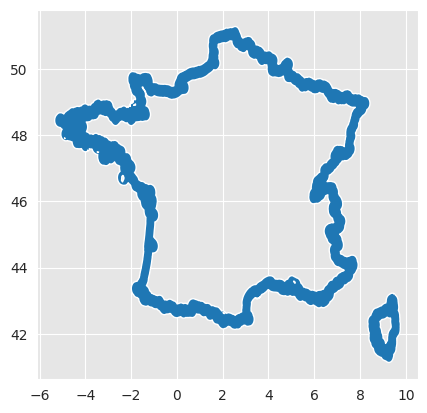

In [76]:
# border_zone = gdf_france.geometry.buffer(0.2)
border_zone = gdf_france.boundary
border_zone = gdf_france.boundary.buffer(0.2)
border_zone.plot()

In [63]:
border_cities

,Geoname ID,Name,Population,Elevation,Coordinates,Latitude,Longitude,city,mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted,mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted,...,geom_Qwen/Qwen2.5-32B_float16_gps_en_,geom_Qwen/Qwen2.5-32B_int8_gps_fr_,geom_Qwen/Qwen2.5-32B_int8_gps_en_,geom_Qwen/Qwen2.5-32B_int4_gps_fr_,geom_Qwen/Qwen2.5-32B_int4_gps_en_,geom_Qwen/Qwen2.5-32B-Instruct_float16_gps_fr_,geom_Qwen/Qwen2.5-32B-Instruct_float16_gps_en_,geom_Qwen/Qwen2.5-72B-Instruct_int4_gps_fr_,geom_Qwen/Qwen2.5-72B-Instruct_int4_gps_en_,is_border
0,3038789,Abbeville,26461,NaN,"50.10521, 1.83547",50.10521,1.83547,Abbeville,50.333333,1.666667,...,POINT (2 50.0833),POINT (1.9833 50.0833),POINT (1.8333 49.8333),POINT EMPTY,POINT (1.1667 49.9333),POINT (1.7667 50.0333),POINT (2.0833 50.1333),POINT EMPTY,POINT EMPTY,True
1,3038712,Achères,22555,NaN,"48.96115, 2.06882",48.96115,2.06882,Achères,48.916389,2.083056,...,POINT (2.1333 48.9333),POINT (2.25 48.925),POINT (2.0833 48.9333),POINT (2.1666666666666665 48.891666666666666),POINT (2.1667 48.8833),POINT (2.1333 48.975),POINT (2.35 48.9722),POINT EMPTY,POINT EMPTY,True
2,3038638,Agde,23001,NaN,"43.31083, 3.47583",43.31083,3.47583,Agde,43.316667,3.333333,...,POINT (3.8667 43.4333),POINT (3.7 43.4),POINT (3.7833 43.4333),POINT (3.5667 43.3833),POINT (3.8667 43.4333),POINT (3.7167 43.4),POINT (3.7667 43.4833),POINT EMPTY,POINT EMPTY,True
3,3038634,Agen,34367,NaN,"44.20199, 0.62055",44.20199,0.62055,Agen,44.000000,0.000000,...,POINT (0.5833 44.1833),POINT (0 44),POINT (0.5167 44.1833),POINT (0 44),POINT (0.5667 44.4833),POINT EMPTY,POINT (0.75 44.1833),POINT EMPTY,POINT EMPTY,True
4,3038393,Aire-sur-la-Lys,10397,NaN,"50.63871, 2.39876",50.63871,2.39876,Aire-sur-la-Lys,50.566667,2.666667,...,POINT (2.9167 50.5833),POINT (2.9667 50.5833),POINT (2.9833 50.6333),POINT (2.93 50.59333333333333),POINT (2.9667 50.6667),POINT EMPTY,POINT (2.7667 50.4833),POINT EMPTY,POINT EMPTY,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2967297,Woippy,13721,NaN,"49.15111, 6.15132",49.15111,6.15132,Woippy,49.466667,6.033333,...,POINT (6.1667 49.1333),POINT (6.1333 49.0833),POINT (6.1667 49.1333),POINT EMPTY,POINT (6.1667 49.25),POINT (6.25 49.1333),POINT (7.1333 48.65),POINT EMPTY,POINT EMPTY,True
996,2967245,Yerres,28897,NaN,"48.71785, 2.49338",48.71785,2.49338,Yerres,NaN,NaN,...,POINT (2.3333 48.7167),POINT EMPTY,POINT (2.3333 48.75),POINT EMPTY,POINT (2.3667 48.7333),POINT (2.35 48.7167),POINT (2.4667 48.7333),POINT EMPTY,POINT EMPTY,True
997,3013701,Yutz,15659,NaN,"49.35571, 6.1926",49.35571,6.19260,Yutz,NaN,NaN,...,POINT (7.08 49.25),POINT (6.7833 49.1333),POINT (6.8333 49.25),POINT EMPTY,POINT (6.1667 49.25),POINT (7.1333 49.25),POINT (6.7833 49.25),POINT EMPTY,POINT EMPTY,True
998,2967189,Yvetot,11232,NaN,"49.61744, 0.75814",49.61744,0.75814,Yvetot,NaN,NaN,...,POINT (0.5833 49.5833),POINT (0.5833 49.5833),POINT (0.4667 49.4833),POINT EMPTY,POINT (0.1667 49.75),POINT (0.6667 49.5833),POINT (0.78 49.65),POINT EMPTY,POINT EMPTY,True


In [82]:
import folium

df_clean = gdf.dropna(subset=[
    "mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted",
    "mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted"
])
m = folium.Map(location=[46.6031, 1.8883], zoom_start=6)
for _, row in df_clean.iterrows():
    # Ajouter le point réel
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],
                        color="blue", radius=4, fill=True, fill_color="blue", popup=row["city"]).add_to(m)
    
    # Ajouter le point prédit
    folium.CircleMarker(location=[row["mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted"], row["mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted"]],
                        color="red", radius=4, fill=True, fill_color="red", popup=row["city"]).add_to(m)

    # Ajouter une ligne entre les deux
    folium.PolyLine([(row["Latitude"], row["Longitude"]), 
                     (row["mistralai/Mistral-7B-v0.1_float16_gps_fr_lat_predicted"], row["mistralai/Mistral-7B-v0.1_float16_gps_fr_lon_predicted"])], 
                    color="green", weight=2, opacity=0.7).add_to(m)

m